#📌 Extracción

In [7]:
import json
import pandas as pd

# 1. Leer el archivo JSON (simulación de API)
with open("/content/drive/MyDrive/Alura/TelecomX_Data.json", "r") as f:
    data = json.load(f)

# 2. Convertir a DataFrame expandido
df = pd.json_normalize(data)

# 3. Renombrar columnas para que sean más claras
df = df.rename(columns={
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "MonthlyCharges",
    "account.Charges.Total": "TotalCharges"
})

# 4. Mostrar columnas finales y primeras filas
print("Columnas finales:\n", df.columns.tolist())
print("\nPrimeras filas del DataFrame:")
print(df.head())

Columnas finales:
 ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Primeras filas del DataFrame:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...      

#🔧 Transformación

In [8]:
import pandas as pd
import numpy as np

# === 1. Conocer el conjunto de datos ===
print("📌 Dimensiones del DataFrame:", df.shape)
print("\n📌 Tipos de datos:")
print(df.dtypes)

print("\n📌 Columnas:")
print(df.columns.tolist())

# Relevantes para el análisis de evasión (churn)
columnas_relevantes = [
    "customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
    "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"
]
print("\n📌 Columnas relevantes para análisis de evasión:")
print(columnas_relevantes)

# === 2. Comprobación de incoherencias ===
print("\n📌 Valores nulos:")
print(df.isnull().sum())

print("\n📌 Valores duplicados:", df.duplicated().sum())

# Revisar valores únicos en variables categóricas
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())

# === 3. Manejo de inconsistencias ===
# Eliminar duplicados
df = df.drop_duplicates()

# Convertir TotalCharges a numérico (puede tener strings vacíos)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Rellenar valores nulos en TotalCharges con 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# Asegurar que MonthlyCharges sea float
df["MonthlyCharges"] = df["MonthlyCharges"].astype(float)

# Normalizar columna Churn (valores vacíos -> 'No')
df["Churn"] = df["Churn"].replace("", "No")

# === 4. Columna de cuentas diarias ===
df["Cuentas_Diarias"] = df["MonthlyCharges"] / 30
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].round(2)

print("\n📌 Nueva columna creada: Cuentas_Diarias")
print(df[["MonthlyCharges", "Cuentas_Diarias"]].head())

# === 5. Estandarización y transformación (opcional) ===
# Convertir valores textuales Sí/No a 1/0 en algunas columnas clave
cols_binarias = ["Churn", "Partner", "Dependents", "PhoneService",
                 "MultipleLines", "OnlineSecurity", "OnlineBackup",
                 "DeviceProtection", "TechSupport", "StreamingTV",
                 "StreamingMovies", "PaperlessBilling"]

for col in cols_binarias:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Sí": 1, "Si": 1, "No": 0})

print("\n📌 Transformación de variables binarias realizada")
print(df[cols_binarias].head())


📌 Dimensiones del DataFrame: (7267, 21)

📌 Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

📌 Columnas:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

📌

#📊 Carga y análisis

📌 Estadísticas descriptivas generales:
        customerID        Churn gender  SeniorCitizen      Partner  \
count         7267  7267.000000   7267    7267.000000  7267.000000   
unique        7267          NaN      2            NaN          NaN   
top     9995-HOTOH          NaN   Male            NaN          NaN   
freq             1          NaN   3675            NaN          NaN   
mean           NaN     0.257190    NaN       0.162653     0.484106   
std            NaN     0.437115    NaN       0.369074     0.499782   
min            NaN     0.000000    NaN       0.000000     0.000000   
25%            NaN     0.000000    NaN       0.000000     0.000000   
50%            NaN     0.000000    NaN       0.000000     0.000000   
75%            NaN     1.000000    NaN       0.000000     1.000000   
max            NaN     1.000000    NaN       1.000000     1.000000   

         Dependents       tenure  PhoneService  MultipleLines InternetService  \
count   7267.000000  7267.000000   7267

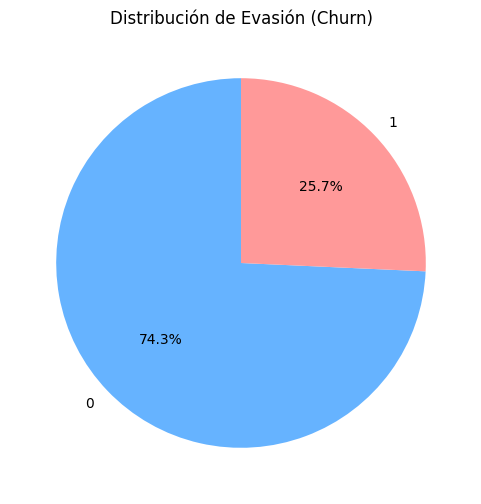

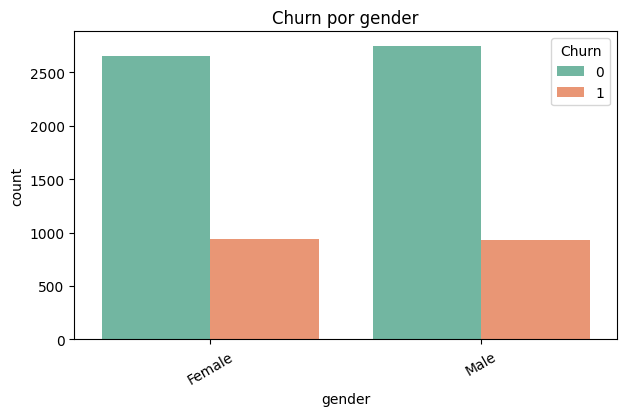

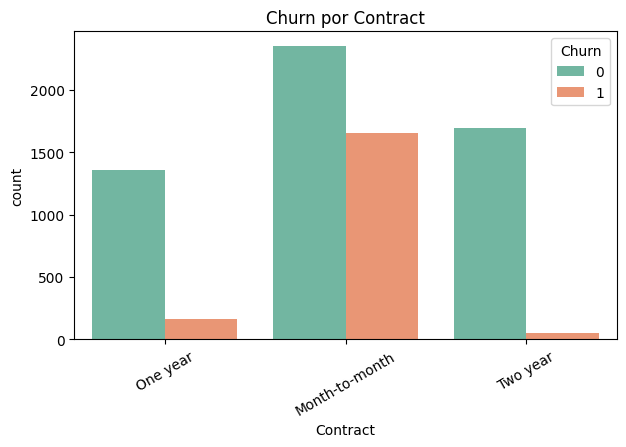

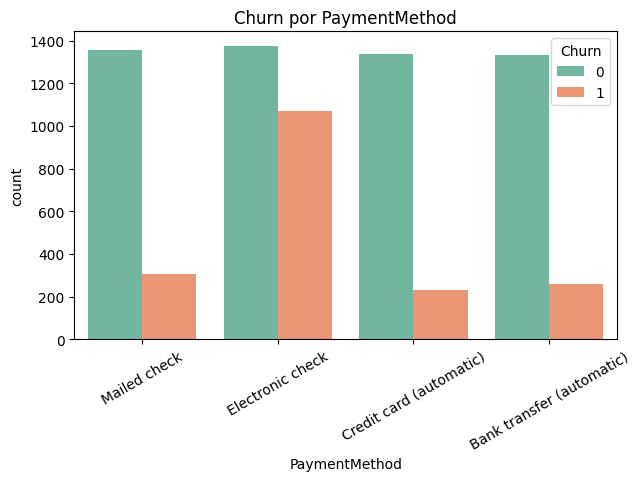

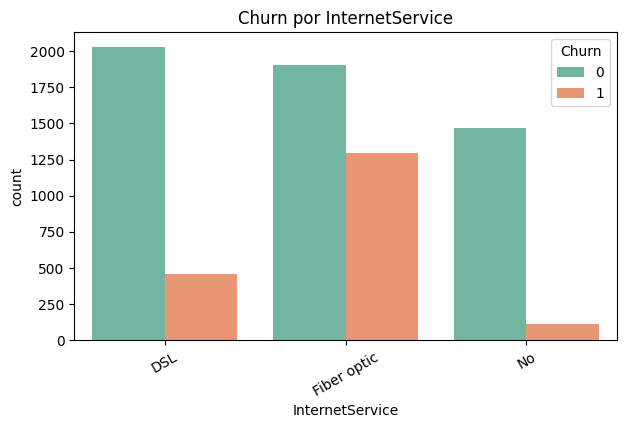

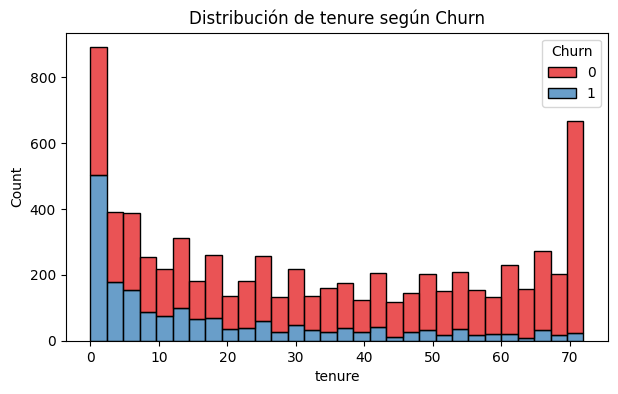

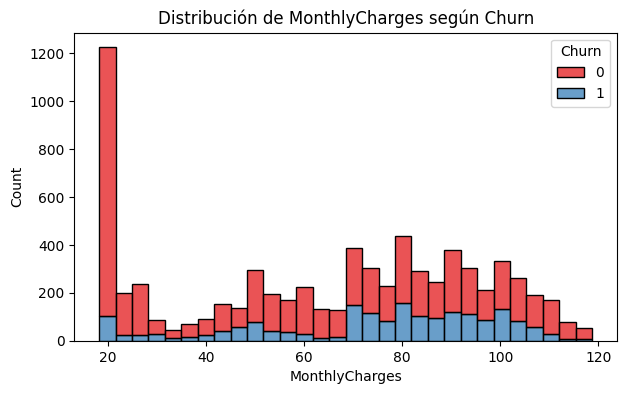

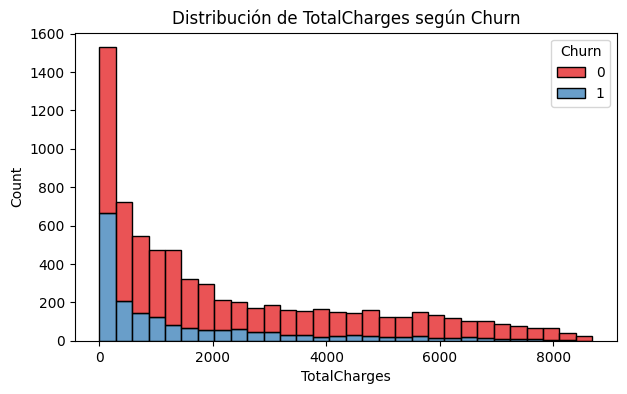

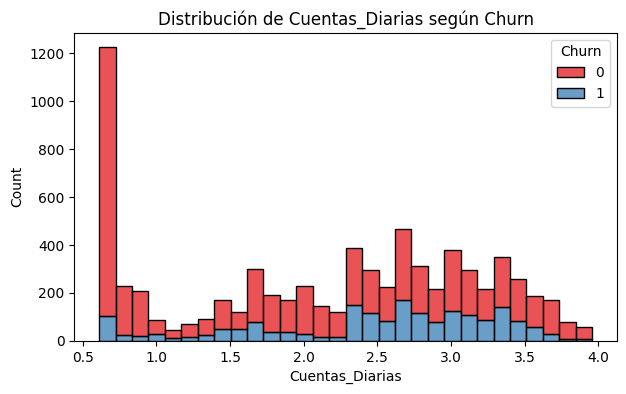

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Análisis descriptivo ===
print("📌 Estadísticas descriptivas generales:")
print(df.describe(include="all"))

print("\n📌 Estadísticas numéricas:")
print(df[["tenure", "MonthlyCharges", "TotalCharges", "Cuentas_Diarias"]].describe())

# Mediana de las principales métricas
print("\n📌 Medianas:")
print(df[["tenure", "MonthlyCharges", "TotalCharges", "Cuentas_Diarias"]].median())

# === 2. Distribución de evasión (Churn) ===
plt.figure(figsize=(6,6))
df["Churn"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999"])
plt.title("Distribución de Evasión (Churn)")
plt.ylabel("")
plt.show()

# === 3. Recuento de evasión por variables categóricas ===
categoricas = ["gender", "Contract", "PaymentMethod", "InternetService"]

for col in categoricas:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"Churn por {col}")
    plt.xticks(rotation=30)
    plt.show()

# === 4. Conteo de evasión por variables numéricas ===
numericas = ["tenure", "MonthlyCharges", "TotalCharges", "Cuentas_Diarias"]

for col in numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Churn", multiple="stack", kde=False, bins=30, palette="Set1")
    plt.title(f"Distribución de {col} según Churn")
    plt.show()


#📄Informe final

# Informe Final — Evasión de Clientes (Churn) en Telecom X

## Introducción
El objetivo de este análisis es comprender los factores asociados a la evasión de clientes (Churn) en Telecom X.
A partir de datos demográficos, servicios contratados y comportamiento de facturación, buscamos identificar patrones
que expliquen por qué algunos clientes cancelan el servicio. Esta información permitirá proponer acciones estratégicas
para reducir la evasión y mejorar la retención.

---


## Limpieza y Tratamiento de Datos
- **Importación**: Se cargó el dataset en formato JSON (simulando una API) y se convirtió a DataFrame con `pandas`.
- **Normalización**: Se expandieron estructuras anidadas (`customer`, `phone`, `internet`, `account`) con `pd.json_normalize`.
- **Estandarización**: Se renombraron columnas a nombres simples (por ejemplo, `account.Charges.Monthly` → `MonthlyCharges`).
- **Tipos de datos**: Conversión de `TotalCharges` y `MonthlyCharges` a numérico; **`Churn`** mapeado a binario (1=Sí, 0=No).
- **Calidad**: Se eliminaron duplicados, se trataron nulos y se creó `Cuentas_Diarias = MonthlyCharges/30`.


## Análisis Exploratorio de Datos (AED)

### 1) Estadísticos descriptivos

,count,mean,std,min,25%,50%,75%,max
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00
MonthlyCharges,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75
TotalCharges,7267.0,2277.182035,2268.648587,0.00,396.200,1389.20,3778.525,8684.80
Cuentas_Diarias,7267.0,2.157292,1.004407,0.61,1.180,2.34,2.995,3.96


**Medianas:** {'tenure': 29.0, 'MonthlyCharges': 70.3, 'TotalCharges': 1389.2, 'Cuentas_Diarias': 2.34}

### 2) Distribución de Evasión (Churn)

- **Tasa global de churn:** `25.72%`

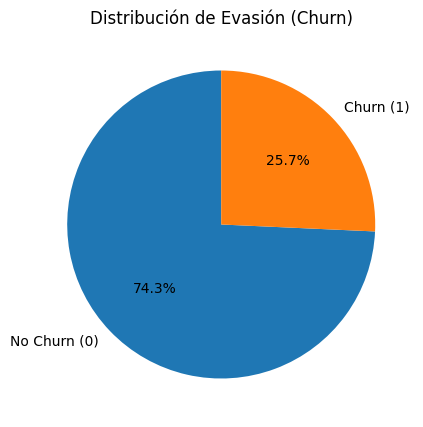

### 3) Churn por Variables Categóricas

**gender** — tasa de churn por categoría:

,Clientes,ChurnRate
gender,,
Female,3592,0.261414
Male,3675,0.253061


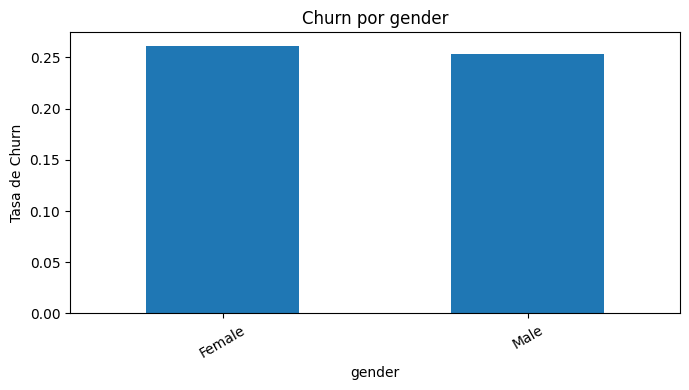

**Contract** — tasa de churn por categoría:

,Clientes,ChurnRate
Contract,,
Month-to-month,4005,0.413233
One year,1519,0.109282
Two year,1743,0.027539


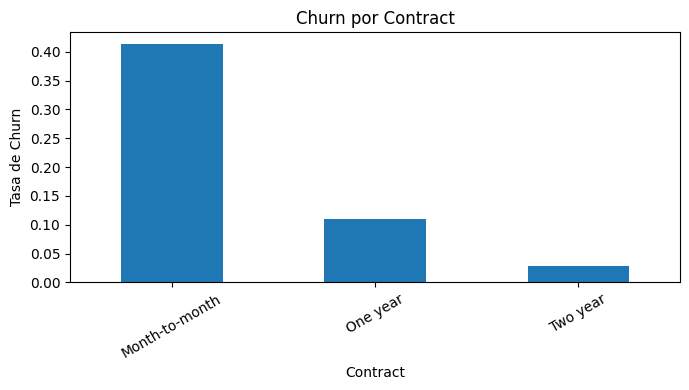

**PaymentMethod** — tasa de churn por categoría:

,Clientes,ChurnRate
PaymentMethod,,
Electronic check,2445,0.438037
Mailed check,1665,0.184985
Bank transfer (automatic),1589,0.162366
Credit card (automatic),1568,0.147959


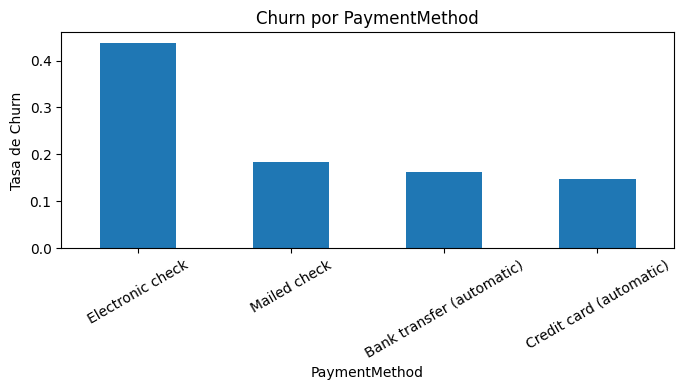

**InternetService** — tasa de churn por categoría:

,Clientes,ChurnRate
InternetService,,
Fiber optic,3198,0.405566
DSL,2488,0.184486
No,1581,0.071474


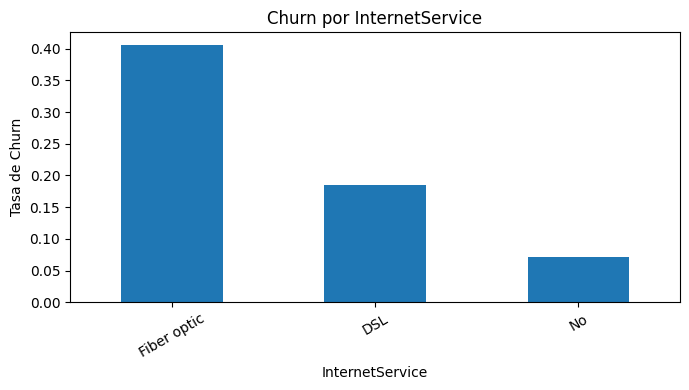

### 4) Variables Numéricas y su relación con Churn

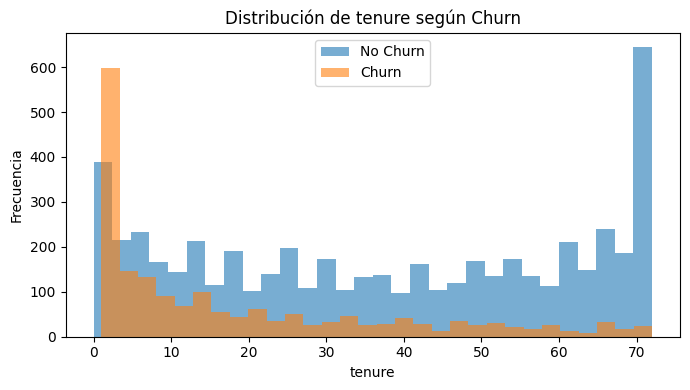

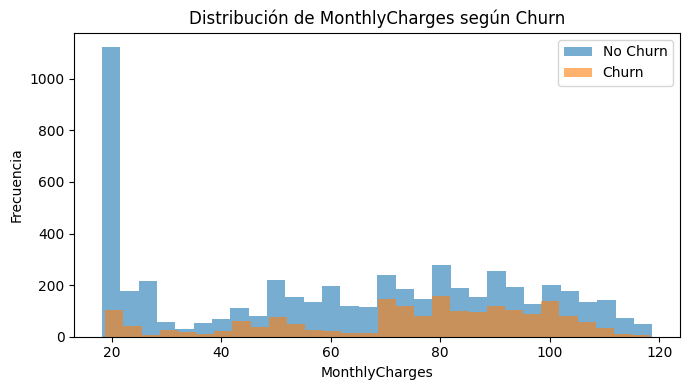

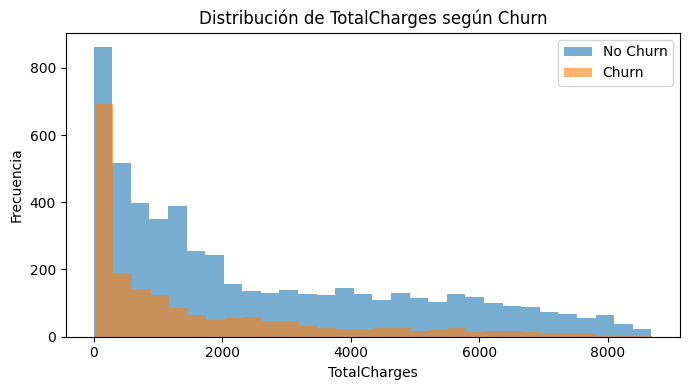

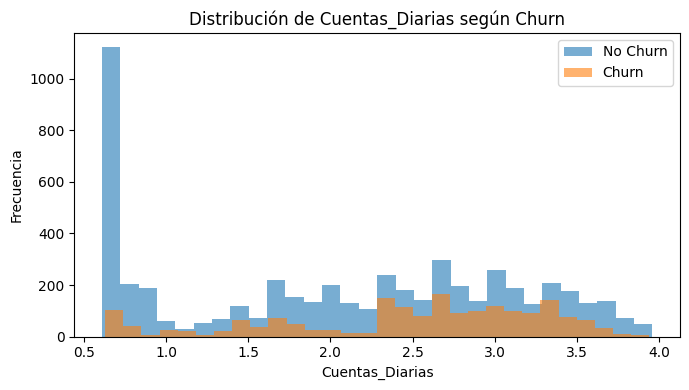

## Conclusiones e Insights

- Los clientes con **Contract = Month-to-month** presentan la **mayor tasa de churn** (41.32%).
- **Método de pago** con mayor churn: `Electronic check` (43.80%).
- **InternetService** más propenso a churn: `Fiber optic` (40.56%).
- Clientes con **tenure ≤ 12 meses** tienen churn `45.78%`, vs **tenure > 24** `13.60%`.
- **Cargos mensuales altos** (>70.30) muestran churn `34.13%` vs `17.34%` en cargos bajos/medios.

## Recomendaciones

- **Incentivar contratos de mayor plazo** (descuentos, meses gratis) para clientes con contrato mensual.
- **Optimizar la experiencia de cobro** y recordatorios para el método de pago con mayor churn (notificaciones proactivas, alternativas de pago).
- **Mejorar la calidad/soporte del servicio de internet** con mayor churn (monitoreo proactivo y upgrades a clientes en riesgo).
- **Programa de onboarding y fidelización** en los primeros 90-180 días (bonos, soporte dedicado, encuestas tempranas).
- **Revisiones de plan y empaquetamiento** para clientes con cargos mensuales altos (ofertas personalizadas, bundles).

In [10]:
# ====== CÓDIGO DE ANÁLISIS Y REPORTE ======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# ---------- Utilidades ----------
def md(text):
    display(Markdown(text))

def ensure_churn_binary(df, col="Churn"):
    """Convierte la columna Churn a 0/1 si está como texto; deja igual si ya es numérica."""
    s = df[col]
    if s.dtype == "O":
        mapping = {"Yes":1, "No":0, "Sí":1, "Si":1, "NO":0, "YES":1, "0":0, "1":1}
        return s.map(mapping).astype("Int64")
    # Si es bool
    if s.dtype == bool:
        return s.astype(int)
    # Si es numérica
    return pd.to_numeric(s, errors="coerce").fillna(0).astype(int)

def churn_rate_by(df, col, churn_col="Churn"):
    g = df.groupby(col)[churn_col]
    out = pd.DataFrame({
        "Clientes": g.size(),
        "ChurnRate": g.mean()
    }).sort_values("ChurnRate", ascending=False)
    return out

def plot_pie_churn(df, churn_col="Churn"):
    counts = df[churn_col].value_counts().sort_index()
    labels = ["No Churn (0)", "Churn (1)"] if set(counts.index) == {0,1} else counts.index.astype(str)
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title("Distribución de Evasión (Churn)")
    plt.show()

def plot_bar(series, title, xlabel, ylabel="Tasa de Churn"):
    plt.figure(figsize=(7,4))
    series.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

def plot_hist_by_churn(df, col, churn_col="Churn", bins=30):
    plt.figure(figsize=(7,4))
    # Dos histogramas superpuestos (sin especificar colores)
    df[df[churn_col]==0][col].plot(kind="hist", bins=bins, alpha=0.6, label="No Churn")
    df[df[churn_col]==1][col].plot(kind="hist", bins=bins, alpha=0.6, label="Churn")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- Robustez: columnas esperadas ----------
expected_cols = [
    "customerID","Churn","gender","SeniorCitizen","Partner","Dependents",
    "tenure","PhoneService","MultipleLines","InternetService","OnlineSecurity",
    "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
    "Contract","PaperlessBilling","PaymentMethod","MonthlyCharges","TotalCharges","Cuentas_Diarias"
]
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    md(f"**Nota:** Faltan columnas esperadas y se omitirán en este informe: `{missing}`")

# Asegurar tipos
if "Churn" in df.columns:
    df["Churn"] = ensure_churn_binary(df, "Churn")

for c in ["MonthlyCharges","TotalCharges","Cuentas_Diarias","tenure"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- 1) Análisis Descriptivo ----------
md("## Análisis Exploratorio de Datos (AED)")
md("### 1) Estadísticos descriptivos")

num_cols = [c for c in ["tenure","MonthlyCharges","TotalCharges","Cuentas_Diarias"] if c in df.columns]
desc_num = df[num_cols].describe().T if num_cols else pd.DataFrame()
if not desc_num.empty:
    display(desc_num)
    md(f"**Medianas:** {df[num_cols].median().to_dict()}")

# ---------- 2) Distribución de Evasión ----------
md("### 2) Distribución de Evasión (Churn)")
if "Churn" in df.columns:
    rate = df["Churn"].mean()
    md(f"- **Tasa global de churn:** `{rate:.2%}`")
    plot_pie_churn(df, "Churn")
else:
    md("> No se encontró la columna `Churn` para esta sección.")

# ---------- 3) Churn por Variables Categóricas ----------
md("### 3) Churn por Variables Categóricas")
cat_cols = [c for c in ["gender","Contract","PaymentMethod","InternetService"] if c in df.columns]
for col in cat_cols:
    rates = churn_rate_by(df, col, "Churn")["ChurnRate"]
    md(f"**{col}** — tasa de churn por categoría:")
    display(churn_rate_by(df, col, "Churn"))
    plot_bar(rates, f"Churn por {col}", col)

# ---------- 4) Variables Numéricas vs Churn ----------
md("### 4) Variables Numéricas y su relación con Churn")
for col in num_cols:
    plot_hist_by_churn(df, col, "Churn", bins=30)

# ---------- 5) Conclusiones e Insights (dinámicos) ----------
md("## Conclusiones e Insights")

insights = []
# Ejemplos dinámicos basados en los datos reales del DF
try:
    if "Contract" in df.columns:
        contract = churn_rate_by(df, "Contract", "Churn")
        top_contract = contract["ChurnRate"].idxmax()
        insights.append(f"- Los clientes con **Contract = {top_contract}** presentan la **mayor tasa de churn** ({contract.loc[top_contract,'ChurnRate']:.2%}).")
    if "PaymentMethod" in df.columns:
        pm = churn_rate_by(df, "PaymentMethod", "Churn").head(1)
        insights.append(f"- **Método de pago** con mayor churn: `{pm.index[0]}` ({pm['ChurnRate'].iloc[0]:.2%}).")
    if "InternetService" in df.columns:
        isv = churn_rate_by(df, "InternetService", "Churn").head(1)
        insights.append(f"- **InternetService** más propenso a churn: `{isv.index[0]}` ({isv['ChurnRate'].iloc[0]:.2%}).")
    if "tenure" in df.columns:
        t_low = df.loc[df["tenure"]<=12, "Churn"].mean()
        t_high = df.loc[df["tenure"]>24, "Churn"].mean()
        insights.append(f"- Clientes con **tenure ≤ 12 meses** tienen churn `{t_low:.2%}`, vs **tenure > 24** `{t_high:.2%}`.")
    if "MonthlyCharges" in df.columns:
        high_m = df["MonthlyCharges"]>df["MonthlyCharges"].median()
        insights.append(f"- **Cargos mensuales altos** (>{df['MonthlyCharges'].median():.2f}) muestran churn `{df.loc[high_m,'Churn'].mean():.2%}` vs `{df.loc[~high_m,'Churn'].mean():.2%}` en cargos bajos/medios.")
except Exception as e:
    insights.append(f"(No se pudieron generar todos los insights dinámicos: {e})")

md("\n".join(insights) if insights else "- No se encontraron insights significativos con las columnas disponibles.")

# ---------- 6) Recomendaciones (basadas en insights) ----------
md("## Recomendaciones")
recs = []
# Reglas simples basadas en insights detectados:
if any("Contract =" in s for s in insights):
    recs.append("- **Incentivar contratos de mayor plazo** (descuentos, meses gratis) para clientes con contrato mensual.")
if any("Método de pago" in s for s in insights):
    recs.append("- **Optimizar la experiencia de cobro** y recordatorios para el método de pago con mayor churn (notificaciones proactivas, alternativas de pago).")
if any("InternetService" in s for s in insights):
    recs.append("- **Mejorar la calidad/soporte del servicio de internet** con mayor churn (monitoreo proactivo y upgrades a clientes en riesgo).")
if any("tenure ≤ 12" in s for s in insights):
    recs.append("- **Programa de onboarding y fidelización** en los primeros 90-180 días (bonos, soporte dedicado, encuestas tempranas).")
if any("Cargos mensuales altos" in s for s in insights):
    recs.append("- **Revisiones de plan y empaquetamiento** para clientes con cargos mensuales altos (ofertas personalizadas, bundles).")

if not recs:
    recs.append("- Implementar **modelo de propensión a churn** y campañas dirigidas con ofertas y contacto proactivo a segmentos de mayor riesgo.")
    recs.append("- Fortalecer **soporte técnico** y resolver tickets críticos en <24h para segmentos con mayor churn.")

md("\n".join(recs))


## Cierre
El análisis permitió cuantificar la tasa de churn global, identificar segmentos con mayor propensión a la evasión
y proponer acciones enfocadas en contrato, método de pago, servicio de internet, antigüedad y nivel de cargos mensuales.
Este informe sienta las bases para un plan de retención y la futura implementación de un modelo predictivo de churn
que priorice a los clientes con mayor riesgo y maximice el impacto de las acciones comerciales y de soporte.
